## The Battle of Neighborhoods W1


### 1. Introduction

This project will explore setting up a firm that provides data science services as a business in Florida. The project will attempt to use the data science approach to develop a strategy to identify potential opportunities to provide data science tools to local orgnaizations to solve their business challenges. 

I have an interest in Florida, given the climate and wide range of outdoor activities. Moreover, I believe that this location provides ample opportunity to pursue a career in data science.

Let's begin by looking at business startup statistics from the US Census Bureau as a starting point to identify what counties indicate economic growth. This data was limited to the last ten years ending in 2019. 

This United States Census Bureau - Business Formation Statistics csv file. This file contains data for all 50 states and corresponding counties. File can be located at website xxx

In [64]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

In [65]:
# Download excel file from US Census Bureau
xlsx = 'https://www.census.gov/econ/bfs/xlsx/bfs_county_apps_annual.xlsx'
with pd.ExcelFile('https://www.census.gov/econ/bfs/xlsx/bfs_county_apps_annual.xlsx') as xls:
    df1 = pd.read_excel(xls, 'Outputfile')
df1.shape

(3147, 20)

In [66]:
xls_df = df1.iloc[2:3147, 0:20] # slice the data frame and add labels
xls_df.columns = ['State', 'County', 'County Code', 'fipstate', 'fipscty', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# more data wranggling to drop unwanted columns, convert columns "2009" through "2019" to integers 
xls_df = xls_df.drop(['County Code', 'fipstate', 'fipscty', '2005', '2006', '2007', '2008'], axis=1)
xls_df[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']] = xls_df[['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].apply(pd.to_numeric)
xls_fl = xls_df.loc[xls_df['State'] =='FL'].reset_index(drop=True) # Slice data set for Florida data only
xls_fl.set_index('County', inplace=True) #Set index to 'County'
xls_fl['Total'] = xls_fl.sum(axis=1) # Add a total column for data visualization 
xls_fl = xls_fl.drop('State', axis=1) # drop unwanted column
xls_fl.sort_values(by='Total', ascending=True, inplace=True) # sort dataframe on 'Total' column (descending), get top 10 counties
xls_fltop10 = xls_fl['Total'].tail(10)

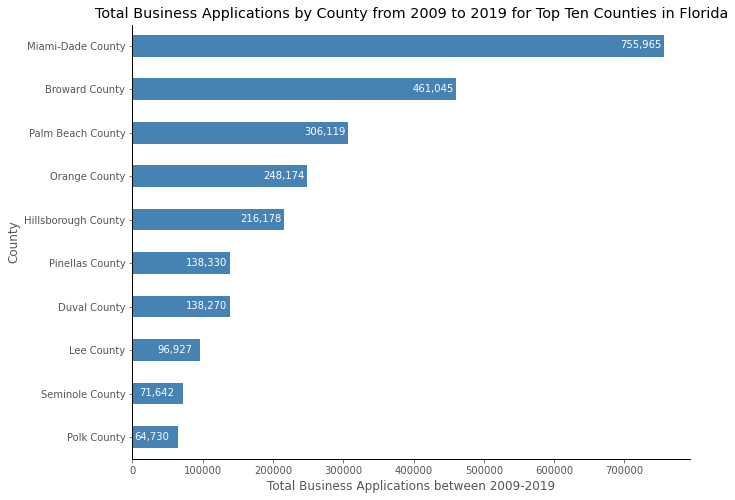

In [84]:
ax = xls_fltop10.plot(kind='barh', figsize=(10, 8), color='steelblue') # Create the Horizontal Bar Chart

plt.xlabel('Total Business Applications between 2009-2019')
plt.title('Total Business Applications by County from 2009 to 2019 for Top Ten Counties in Florida')
plt.grid(b=None)

ax.set_facecolor("white") # this is testing 
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

for index, value in enumerate(xls_fltop10): # annotate value labels for each county
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 62000, index - 0.05), color='white') # place text at the end of bar and fit within the bar

plt.show()

_The top three counties outperform rest of top ten._

In [67]:
xls_fl.sort_values(by='Total', ascending=False, inplace=True) # sort dataframe on 'Total' column (descending) for line plots
xls_df2 = xls_fl.iloc[0:5, 0:11] # slice the data frame to display top 5 counties for line plot
xls_df3 = xls_df2.transpose() # Transpose data for line chart

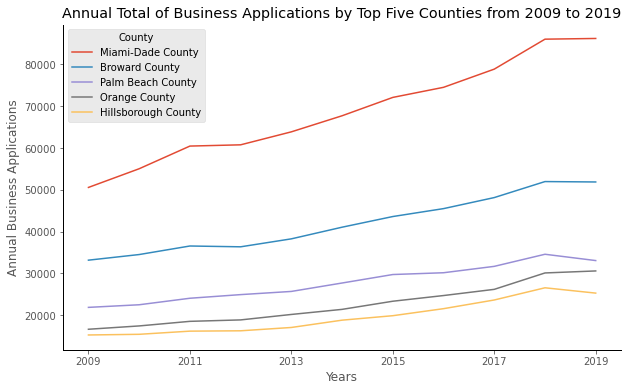

In [82]:
ax = xls_df3.plot(kind='line', figsize=(10, 6)) # Make Line Chart
plt.title('Annual Total of Business Applications by Top Five Counties from 2009 to 2019')
plt.ylabel('Annual Business Applications')
plt.xlabel('Years')
plt.grid(b=None)
ax.set_facecolor("white") # this is testing 
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.show() # need this line to show the updates made to the figure

_The top three counties outperform rest of five over ten year span._

#### 1.1 What makes Florida a good location for starting a business?

Enterprise Florida, Inc. (EFI) is a public-private partnership between Florida’s business and government leaders and is the principal economic development organization for Florida.

EFI promotes various advantages that Florida provides including:
*	4th largest economy in the U.S. and 18th largest economy in the world (if Florida were a nation). (BEA & IMF)/
*	Ranked 4th in the nation for high-tech employment by CompTIA, Florida boasts nearly 237,000 high-tech workers.
*	Number 4 in high-tech employment in the US (TechAmercia).
*	Number 2 business birthrate (U.S. Chamber of Commerce).
*	Number 3 for high-tech establishments (TechAmerica).

Reference EFI website for statistics.

### 2.0 Business Problem <a name="introduction"></a>

The objective of this project is to analyze the businesses located within the cities of both Broward and Palm Beach counties. These represent the second and third counties with the most new business applications over a ten year period across the 67 counties in Florida. These two counties are also within the [Miami Metropolitan area](https://en.wikipedia.org/wiki/Miami_metropolitan_area#:~:text=The%20Miami%20metropolitan%20area%2C%20also%20known%20as%20the,the%20seventh-largest%20metropolitan%20area%20in%20the%20United%20States). 

A key _assumption_ here is that data science services can be done effectively with occassional in-person interactions reinforced through virtual meetings. Therefore we can expand the clientele across larger distance to increase potential for economic benefit.  

The data search will focus on businesses that fall within the four key industry groups that are well represented in South Florida based on the [Industry Key Areas](https://www.enterpriseflorida.com/industries/). Both these counties exhitied strong representation of businesses as illustrated by corresponding industry specific chorolpeth maps see links below.

* [Information Technology](https://www.enterpriseflorida.com/wp-content/uploads/Florida-IT-companies-map.pdf)
* [Life Sciences](https://www.enterpriseflorida.com/wp-content/uploads/Florida-LifeSciences-companies-map.pdf)
* [Financial](https://www.enterpriseflorida.com/wp-content/uploads/Florida-Financial-Services-companies-map.pdf)
* [Clean Tech](https://www.enterpriseflorida.com/wp-content/uploads/Florida-Cleantech-companies-map.pdf)


The _benefit_ of this study is that it produces a strategy that can be tailored to servicing the four key industries from either a location in Broward county or Palm Beach County. In addition this strategy can also be used to focus on specific industries.

The _target audience_ for this project includes people who are interested in practicing data science or providing techonolgy services / products that are applicable to the four selected industries mentioned and across both counties.

#### 2.1 Analytical Approach - Clustering through use of k-means

This project will apply clustering _k-means_ to explore a data set of businesses records containing business data including  location then partion the data into clusters. These clusters can then be analyzed and characterized.

#### 2.2 Data Source(s)

D & B Hoovers is among the world's largest commerical database of 120 million business records. Fortunately I have limited access during the time of this project to research businesses based on select criteria. I have used the following parameters to work within the limited access and obtain records for businesses based on the following criteria:

* Located within each county Broward or Palm Beach
* Employees (Across All Sites) - more than 25
* Annual Revenue - More than $5M annual 
* D & B Hoovers categories (later they will be matched to Enterprise Florida Industries) 

The extracted D&B excel file contains 495 records along with the business attributes, address information and but not geo coordinates. 

Google Sheets provides an app that can seed a spreadsheet with geo coordinates provided adequate/accurate address information is provided. Therefore I uploaded the file onto google sheets then used geo code app to seed the file for each business location. 

Lastly after downloading the seeded file I used a VBA macro in excel to calculate distances to two central locations (at the heart of each county) using the [Haversine equations](https://stackoverflow.com/questions/35175057/vba-haversine-formula).

>#### 2.2.1 Industry Category Mapping to Enterprise Florida Key Industries   
>The B&D Hoovers database categories were mapped to the Enterprise Florida key Industries after reviewing the corresponding  Industry briefs and maps from Enterprise Florida.
>#### <u>InfoTech</u> 
Business Support Services, Market Research and Opinion Polling, Computer and Peripheral Equipment Manufacturing, Computer Programming, Computer System Design Services, Data Processing, Internet and Web Services, Software, Magnetic and Optical Media Manufacturing, Semiconductor and Other Electronic Component Manufacturing, Communications Equipment Manufacturing, Miscellaneous Telecommunication Services, Broadcasting and Media, Miscellaneous Information Services
>#### <u>LifeScience</u>
Health and Personal Care Wholesale, Pharmaceutical Manufacturing, Ambulatory Services, Dentists, Diagnostic Laboratories, Hospitals, Medical Equipment and Supplies, Outpatient Care, Physicians and Health Practitioners.
>#### <u>Financial</u>  
Banking, Investment Banking, Investment Services, Mortgage and Credit
>#### <u>Clean Tech</u>
Electricity Generation and Distribution.

#### 2.3 _Data Preparation_

Operations in Excel & Google Sheets 
* Removed unnecessary Columns - Deleted rows
* Seeded geo cooridnates in google sheets with geo coords app then verified sample values 
* Added VBA Macro to calculate distances for Fort Lauderdale and Palm Beach locations 

The following columns were removed as they were redundant or not relevant to further analysis:

1. <u>Industry classification codes</u>: ANZSIC 2006 Description/Code, NACE Rev 2 Description/Code, ISIC Rev 4 Description/Code, UK SIC 2007 Description/Code, NAICS 2017 Description/Code, US SIC 1987 Description/Code, US 8-Digit SIC Description/Code

2. <u>Redundant information</u>: Parent company information: Ultimate Parent Country/Region, Parent Company/Region, State or Province. Address Line, Postal Code 

3. <u>Incomplete or missing information for entire data set</u>: Assets, Pre Tax Profit

4. <u>Information not relevant to study</u>: Direct Marketing Status, Source, Key ID, TPS Flag, Ticker, Is Headquarters, URL, Fax, Phone, Entity Type 

Lastly the file was saved in a csv format for upload to complete the remainder of the data wrangling in Python.  

In [70]:
# import seeded file with geocodes and distances
url = 'https://github.com/casalf724/Capstone_Project/blob/main/DBH-BRD_PB-list-12-01.csv?raw=true'
df = pd.read_csv(url, index_col=0).reset_index(drop=False)
df.shape

(495, 14)

In [71]:
# Replace missing values for Names and Employees at site
var = df['Fullname']
var2 = df['Employees_All']
replaceNm = df['Name'].fillna(value=var, inplace=True)
replaceEmp = df['Employees'].fillna(value=var2, inplace=True)
df = df.drop(['Fullname', 'Employees_All'], axis=1) # Drop duplicate columnns

In [72]:
# Transform DB Hoovers Industries to Enterprise Fl Key Industries 
key_industry = {'Banking':'Financial', 'Investment Banking':'Financial', 'Investment Services':'Financial', 'Mortgage and Credit':'Financial', 'Health and Personal Care Wholesale':'LifeScience', 'Pharmaceutical Manufacturing':'LifeScience', 'Ambulatory Services':'LifeScience', 'Dentists':'LifeScience', 'Diagnostic Laboratories':'LifeScience', 'Hospitals':'LifeScience', 'Medical Equipment and Supplies':'LifeScience', 'Outpatient Care':'LifeScience', 'Physicians and Health Practitioners':'LifeScience', 'Business Support Services':'InfoTech', 'Market Research and Opinion Polling':'InfoTech', 'Computer and Peripheral Equipment Manufacturing':'InfoTech', 'Computer Programming':'InfoTech', 'Computer System Design Services':'InfoTech', 'Data Processing':'InfoTech', 'Internet and Web Services':'InfoTech', 'Software':'InfoTech', 'Magnetic and Optical Media Manufacturing':'InfoTech', 'Semiconductor and Other Electronic Component Manufacturing':'InfoTech', 'Communications Equipment Manufacturing':'InfoTech', 'Miscellaneous Telecommunication Services':'InfoTech', 'Broadcasting and Media':'InfoTech', 'Miscellaneous Information Services':'InfoTech', 'Electricity Generation and Distribution':'Clean Tech'} 
DB_industry = df['DB Hoovers Industry']
df['Industry'] = DB_industry.map(key_industry)
col_name = 'Industry'
col_new = df.pop(col_name)
df.insert(8, col_name, col_new)
df= df.drop('DB Hoovers Industry', axis=1) # drop duplicate column

#### 2.4 _Description of the data_


The file below shows the final dataset. The dataset consists of a single Dataframe with 495 rows and 12 columns containing Company Name, City, Postal Code, Latitude, Longitude, Distance to FL, Distance to PB, Industry, Revenue, Employees, Ownership Type, and Parent Country/Region.



In [85]:
df.head(10)

,Name,City,Postal Code,Latitude,Longitude,Miles to Ft Laud,Miles to Palm Beach,Industry,Revenue,Employees,Ownership Type,Parent Country_Region
0,"Simple Living Technology, Inc.",Jupiter,33469-2680,26.969722,-80.094478,58.66,17.77,InfoTech,"30,000,000",200,Private,United States
1,"Gfo Advisory Services, LLC",Jupiter,33477-5116,26.961246,-80.085084,58.11,17.11,Financial,"19,376,608",28,Private,United States
2,Gen Spring Family Offices,Jupiter,33477-5116,26.961246,-80.085084,58.11,17.11,Financial,"8,237,818.70",4,Private,United States
3,Hearx West LLC,Palm Beach Gardens,33410-4237,26.936356,-80.080017,56.41,15.37,LifeScience,"136,780,000",200,Private,United States
4,Harbourside Place LLC,Jupiter,33477,26.935707,-80.082405,56.36,15.34,Financial,"5,570,269.10",34,Private,United States
5,"Group One Mortgage, Inc.",Jupiter,33477-5142,26.933477,-80.076235,56.23,15.15,Financial,"9,104,755.40",80,Private,United States
6,HealthyPetNet,Jupiter,33458-6059,26.927924,-80.141550,55.69,15.67,LifeScience,"18,513,643",33,Private,United States
7,Jupiter Medical Group PA,Jupiter,33458-5700,26.925919,-80.101242,55.62,14.85,LifeScience,"5,231,174",30,Private,United States
8,"Jupiter Medical Center, Inc.",Jupiter,33458-7205,26.922587,-80.096499,55.40,14.57,LifeScience,"236,907,180",500,Nonprofit,United States
9,Ob Gyn Specialist of The Palm Beaches,Jupiter,33458-7100,26.921694,-80.098929,55.33,14.54,LifeScience,"5,662,064.10",150,Private,United States
